In [2]:
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from scipy.io import loadmat
from __future__ import division
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pickle

%matplotlib inline


## Load data

In [3]:
normR10 = loadmat('normbin_r10.mat')['C']
normR10 = np.nan_to_num(np.swapaxes(normR10,0,2))
print(normR10.shape)

(69, 21, 634)


In [4]:
#Dataset format is [Neurons][Times][Trials]
def trialShuffle(dataset):
    for i in range(dataset.shape[0]):
        for j in np.arange(dataset.shape[1]):
            np.random.shuffle(self.dataset[i,j,:])

def binShuffle(dataset):
    for i in range(dataset.shape[0]):
        for k in np.arange(dataset.shape[2]):
            np.random.shuffle(self.dataset[i,:,k])

## Transform data into X, y, trial

In [5]:
def trialToXyT(dataset):
    X = np.transpose(dataset).reshape(-1,dataset.shape[0])
    y = np.arange(X.shape[0])%dataset.shape[1]
    trial = np.arange(X.shape[0])//dataset.shape[1]
    return {'X':X,'y':y,'trial':trial}

## Classify with batch of classifiers

In [35]:
def temporalGeneralization(X, y):
    times = np.unique(y)
    temporalGeneralizationMatrix = np.zeros([len(times),len(times)])
    for timei in times:
        clf = OneClassSVM()
        clf.fit(X[y==timei])
        dist = clf.decision_function(X)
        temporalGeneralizationMatrix[timei, :] = np.array([np.median(dist[y==t]) for t in times])
        
    M = temporalGeneralizationMatrix
    M = M - M.min(axis=1).reshape(-1,1)
    M = M/M.max(axis=1).reshape(-1,1)
    return M

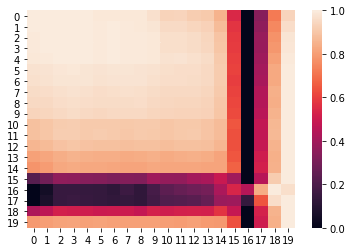

In [42]:
dataset = trialToXyT(normR10[:,:20,:])
X = dataset['X']; y = dataset['y']
M = temporalGeneralization(X,y)
sns.heatmap(M)

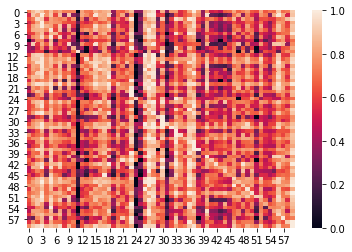

In [39]:
tempo = 16
dataset = trialToXyT(normR10[:,:20,:])
X = dataset['X']; y = dataset['y']; t = dataset['trial'];
M = temporalGeneralization(X[y==tempo],t[y==tempo]%60)
sns.heatmap(M)